In [1]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/n95_masks/
  inflating: dataset/n95_masks/0_0_0 copy 35.jpg  
  inflating: dataset/n95_masks/0_0_0 copy 60.jpg  
  inflating: dataset/n95_masks/0_0_0 copy 82.jpg  
  inflating: dataset/n95_masks/0_0_0 copy 94.jpg  
  inflating: dataset/n95_masks/0_0_0 copy 95.jpg  
  inflating: dataset/n95_masks/0_0_0 copy 97.jpg  
  inflating: dataset/n95_masks/0_0_0.jpg  
  inflating: dataset/n95_masks/0_0_0073OyrFly1gbeb261k8aj30u00u0whj.jpg  
  inflating: dataset/n95_masks/0_0_0073OyrFly1gbeb28c8vmj30u00u042e.jpg  
  inflating: dataset/n95_masks/0_0_007E1yvit3zx0j30jk0sgtet.jpg  
  inflating: dataset/n95_masks/0_0_007ESimlly1g1yvit3zx0j30jk0sgtet.jpg  
  inflating: dataset/n95_masks/0_0_1 copy 11.jpg  
  inflating: dataset/n95_masks/0_0_1 copy 34.jpg  
  inflating: dataset/n95_masks/0_0_1 y 11.jpg  
  inflating: dataset/n95_masks/0_0_10 copy 7.jpg  
  inflating: dataset/n95_masks/0_0_12 copy 9.jpg  
  inflating: dataset/n95_masks/0_0_

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import cv2

In [3]:
dir_n95img = "dataset/n95_mask/"
dir_withimg = "dataset/with_mask/"
dir_withoutimg = "dataset/without_mask/"
mask_n95 = glob.glob(dir_n95img+"*.jpg")
mask_with = glob.glob(dir_withimg+"*.jpg")
mask_without = glob.glob(dir_withoutimg+"*.jpg")

In [4]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

[INFO] loading images...


In [5]:
for img in range(len(mask_n95)):
  img_temp=cv2.imread(mask_n95[img], 1)
  img_temp=cv2.resize(img_temp,(224,224))
  image = img_to_array(img_temp)
  image = preprocess_input(image)
  data.append(image)
  labels.append("n95files")

In [6]:
for img in range(len(mask_with)):
  img_temp=cv2.imread(mask_with[img], 1)
  img_temp=cv2.resize(img_temp,(224,224))
  image = img_to_array(img_temp)
  image = preprocess_input(image)
  data.append(image)
  labels.append("withfiles")

In [7]:
for img in range(len(mask_without)):
  img_temp=cv2.imread(mask_without[img], 1)
  img_temp=cv2.resize(img_temp,(224,224))
  image = img_to_array(img_temp)
  image = preprocess_input(image)
  data.append(image)
  labels.append("withoutfiles")

In [8]:
lab=[]
for i in labels:
  if i=="n95files":
    lab.append(0)
  elif i=="withfiles":
    lab.append(1)
  else:
    lab.append(2)
print(lab)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
data = np.array(data, dtype="float32")
labels = np.array(lab[:])

In [10]:
labels= labels.reshape(len(labels),1)
labels.shape

(1911, 1)

In [11]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, random_state=42)

In [12]:
trainX = trainX.reshape(trainX.shape[0], 224, 224, 3)
testX = testX.reshape(testX.shape[0], 224, 224, 3)
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalizing the data to help with the training
trainX /= 255
testX /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 3
trainY = np_utils.to_categorical(trainY, n_classes)
testY = np_utils.to_categorical(testY, n_classes)

trainX.shape

(1528, 224, 224, 3)

In [13]:
trainY.shape

(1528, 3)

In [14]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [15]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 200)     5600      
_________________________________________________________________
activation (Activation)      (None, 222, 222, 200)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 200)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 100)     180100    
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 100)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 291600)            0

In [17]:
# compile our model
print("[INFO] compiling model...")
model.compile(loss="categorical_crossentropy", optimizer="adam",
	metrics=["accuracy"])

[INFO] compiling model...


In [18]:
# train the head of the network
print("[INFO] training head...")
data = aug.flow(trainX, trainY)
H = model.fit(data,epochs=100,validation_data=(testX,testY))

[INFO] training head...
Epoch 1/100
48/48 [==============================] - 27s 391ms/step - loss: 1.1023 - accuracy: 0.4629 - val_loss: 1.0160 - val_accuracy: 0.4752
Epoch 2/100
48/48 [==============================] - 18s 363ms/step - loss: 1.0125 - accuracy: 0.5268 - val_loss: 0.8883 - val_accuracy: 0.5744
Epoch 3/100
48/48 [==============================] - 18s 363ms/step - loss: 0.9187 - accuracy: 0.5768 - val_loss: 0.6402 - val_accuracy: 0.7023
Epoch 4/100
48/48 [==============================] - 18s 367ms/step - loss: 0.7120 - accuracy: 0.6857 - val_loss: 0.5351 - val_accuracy: 0.7859
Epoch 5/100
48/48 [==============================] - 18s 363ms/step - loss: 0.6557 - accuracy: 0.7040 - val_loss: 0.5769 - val_accuracy: 0.7389
Epoch 6/100
48/48 [==============================] - 17s 361ms/step - loss: 0.6186 - accuracy: 0.7193 - val_loss: 0.4820 - val_accuracy: 0.7990
Epoch 7/100
48/48 [==============================] - 17s 362ms/step - loss: 0.5621 - accuracy: 0.7740 - val_loss

In [19]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=35)

[INFO] evaluating network...


In [20]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [21]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=['n95_mask','with_mask','without_mask']))

              precision    recall  f1-score   support

    n95_mask       0.78      0.84      0.81        92
   with_mask       0.86      0.81      0.84       118
without_mask       0.98      0.98      0.98       173

    accuracy                           0.90       383
   macro avg       0.88      0.88      0.88       383
weighted avg       0.90      0.90      0.90       383



In [25]:
score = model.evaluate(testX,testY,verbose=1)
print('Test loss',score[0])
print('Test accuracy',score[1])

12/12 [==============================] - 1s 48ms/step - loss: 0.2604 - accuracy: 0.8956
Test loss 0.26038286089897156
Test accuracy 0.8955613374710083


In [29]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector.h5")

[INFO] saving mask detector model...


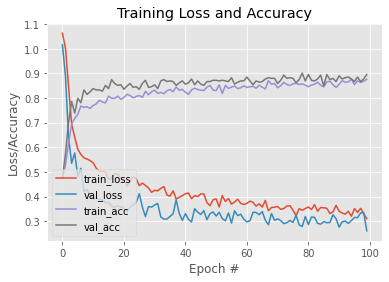

In [23]:
# plot the training loss and accuracy
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")